This is run a Google Colab Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading files

In [ ]:
# !wget --header="Host: www.ncbi.nlm.nih.gov" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7" --header="Referer: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE214611" --header="Cookie: _gid=GA1.2.843222926.1683780721; ncbi_sid=0C4234AB45C74711_0000SID; _ga=GA1.1.1244755766.1683780721; _ga_DP2X732JSX=GS1.1.1683780720.1.1.1683782404.0.0.0; _gat_ncbiSg=1; ncbi_pinger=N4IgDgTgpgbg+mAFgSwCYgFwgAwGEAsATAMwDsAjAGz4Csup+pl52rb7H5IANCAMYAbZHwDWAOygAPAC6ZQxAJyYQVUkwAc2HiHxasqhfirb8+ZYOHips3rWVdblZQDMAhgIDOUE6WXUttur25PiUAHSUkZTqpNjk5BTqQbZKWNo0eiCI0tJgHhgA9AUA7qVhYnwARsjlAgC25ciIYQDmAPYwBS1QbQWobcViAm2uqAUA/K58fAC8AOIAygCihCHM5ABkzm0Qda7SM87IAt68NFxpZ4TKABTZuQCUIAC+vACuQyOoEjJyIMTEFzuLzaYhmLDSCBvU7/IKXf6pFSUNSUQwmTIGIhKWzgkAfYajH42HQ0ZTXM5OLA0VHpXxYAIgZjKTSA178Np1OptMREv7XLDdNqg5QmFxvAQCdIi3iETJ4IhkKi0eiMZgcdXsBwgVbKQUYAByAHl9UsMM5xQIDcaltpCPyQKViuUqjUhg0xE1Wh1bYjyApZaCMdhNKCLip1Phkv97SwaIDbID6WFiOowuSQHH7CR0zRcdTfM9nkA" --header="Connection: keep-alive" "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE214611&format=file" -c -O '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW.tar'

In [ ]:
# !tar -xvf '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW.tar' -C '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW/'

In [ ]:
# !cd '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW/' && for f in *.tar.gz; do tar -xvzf "$f" -C "$(dirname "$f")"; done

In [ ]:
# !unzip '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping.zip' -d '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW'

## scPSS

In [2]:
!pip install git+https://github.com/SaminRK/scPSS.git

  Cloning https://github.com/SaminRK/scPSS.git to /tmp/pip-req-build-_ffuddfz
  Running command git clone --filter=blob:none --quiet https://github.com/SaminRK/scPSS.git /tmp/pip-req-build-_ffuddfz
  Resolved https://github.com/SaminRK/scPSS.git to commit c84c437ae3908a552b9b9c484bf78f323d5f9f83
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.6 MB/s eta 0:00:00
  Created wheel for scPSS: filename=scPSS-0.1.0-py3-none-a

In [3]:
ROOT_PATH = '/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/Infracted Heart Border Zone - GSE214611_RAW'

In [4]:
OUTPUT_PATH = '/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/outputs'
FIGURE_PATH = f'{OUTPUT_PATH}/figures'
PROBLEM_KEY = 'ref_0_que_1-7'

In [5]:
import scanpy as sc
import pandas as pd

In [6]:
metadata_sc = pd.read_csv(f'{ROOT_PATH}/Single-Cell-Spatial-Transcriptomics-for-Border-zone/sn_wc_object_integrated@meta.data.csv', index_col=0)
metadata_sc_t = metadata_sc.rename(index=lambda x: x.split('_')[0])
metadata_sc_t['obs_names'] = metadata_sc_t.index

In [7]:
def get_anndata(mtx_path_id, metadata_orig_id):
    PATH = f'{ROOT_PATH}/{mtx_path_id}'
    ad = sc.read_10x_mtx(PATH)
    ad.obs = ad.obs.rename(index=lambda x: x.split('-')[0])
    A = metadata_sc_t[metadata_sc_t['orig.ident'] == metadata_orig_id]

    ad.obs = ad.obs.merge(A, left_index=True, right_index=True, how='left')

    return ad

In [8]:
def pp_anndata(ad, n_top_genes=None, plot=False):
    ad.var_names_make_unique()

    sc.pp.filter_cells(ad, min_genes=200)
    sc.pp.filter_genes(ad, min_cells=3)

    ad.var['mt'] = ad.var_names.str.startswith('mt-')
    sc.pp.calculate_qc_metrics(ad, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    if plot:
        sc.pl.violin(ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                jitter=0.4, multi_panel=True)
        sc.pl.scatter(ad, x='total_counts', y='pct_counts_mt')
        sc.pl.scatter(ad, x='total_counts', y='n_genes_by_counts')

    ad = ad[ad.obs.pct_counts_mt <= 5, :]

    sc.pp.normalize_total(ad, target_sum=1e4)
    sc.pp.log1p(ad)

    if n_top_genes is not None:
        sc.pp.highly_variable_genes(ad, n_top_genes=n_top_genes)
        ad.raw = ad
        ad = ad[:, ad.var.highly_variable]

    if plot:
        sc.pl.highly_variable_genes(ad)

    return ad

## Prepare training and testing dataset

In [9]:
def get_mtx_path_id_metadata_orig_id(problem_key):
    exp_meta_keys = {
        'ref_0_que_1hr': {
            'reference': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'query': [
                ('sn1hr_1', 'sn1_1'),
                ('sn1hr_2', 'sn1_2'),
            ]
        },
        'ref_0_que_4hr': {
            'reference': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'query': [
                ('sn4hr', '4HR'),
            ]
        },
        'ref_0_que_1': {
            'reference': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'query': [
                ('snd1_1', 'D1_MI'),
                ('snd1_2', 'D1_MI_Hrt_nuclei'),
                ('snd1_3', 'D1_IR30_Hrt_nuclei'),
                ('snd1_4', 'WT_IR30_D1_2'),
                ('snd1_5', 'WT_IR30_D1_3'),
            ]
        },
        'ref_0_que_3': {
            'reference': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'query': [
                ('snd3_1', 'WT_IR30_D3'),
                ('snd3_2', 'D3F_M_rep1'),
                ('snd3_3', 'D3F_M_rep2'),
            ]
        },
        'ref_0_que_7': {
            'reference': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'query': [
                ('snd7_1', 'snD7_1'),
                ('snd7_2', 'snD7_1'),
                ('snd7_3', 'D5_D7'),
            ]
        },
        'ref_0_que_1-7': {
            'reference': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'query': [
                ('sn1hr_1', 'sn1_1'),
                ('sn1hr_2', 'sn1_2'),
                ('sn4hr', '4HR'),
                ('snd1_1', 'D1_MI'),
                ('snd1_2', 'D1_MI_Hrt_nuclei'),
                ('snd1_3', 'D1_IR30_Hrt_nuclei'),
                ('snd1_4', 'WT_IR30_D1_2'),
                ('snd1_5', 'WT_IR30_D1_3'),
                ('snd3_1', 'WT_IR30_D3'),
                ('snd3_2', 'D3F_M_rep1'),
                ('snd3_3', 'D3F_M_rep2'),
                ('snd7_1', 'snD7_1'),
                ('snd7_2', 'snD7_1'),
                ('snd7_3', 'D5_D7'),
            ]
        }
    }

    return exp_meta_keys[problem_key]

In [10]:
exp_meta_keys = get_mtx_path_id_metadata_orig_id(PROBLEM_KEY)

## Prepare problem dataset

In [11]:
imp_celltypes = ['Ankrd1', 'Xirp2', 'Myh6']

In [12]:
import anndata as AD

adatas = {}

for key, item in exp_meta_keys.items():
    for i, (mtx_path_id, metadata_orig_id) in enumerate(item):
        ad = pp_anndata(get_anndata(mtx_path_id, metadata_orig_id))
        ad = ad[ad.obs['final_cluster'].isin(imp_celltypes)]
        dataset_id = f"{key}_{i+1}"
        ad.obs['sample'] = dataset_id
        ad.obs['dataset'] = key
        adatas[f"{key}_{i+1}"] = ad

adatas

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-12-15d7a7c29f6a>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['sample'] = dataset_id
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-12-15d7a7c29f6a>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['sample'] = dataset_id
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-12-15d7a7c29f6a>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['sample'] = dat

{'reference_1': AnnData object with n_obs × n_vars = 1390 × 17676
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset'
     var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
     uns: 'log1p',
 'reference_2': AnnData object with n_obs × n_vars = 1390 × 20456
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_count

In [13]:
ad = AD.concat(adatas, label='batch_key')
ad.obs_names_make_unique()
ad

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 14779 × 1426
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'batch_key'

In [14]:
sc.tl.pca(ad)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292:

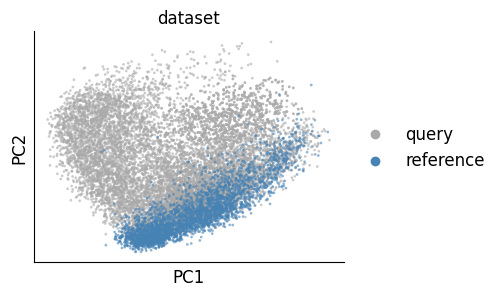

In [15]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'datagroup' categories
custom_palette = [ "#A9A9A9", "#4682B4",]  # SteelBlue and DarkGray

# Map the colors to 'datagroup' categories
ad.uns['dataset_colors'] = custom_palette

# Reorder 'ad' by 'datagroup' first by 'reference', then by 'query'
ad = ad[ad.obs['dataset'].argsort(kind='mergesort')]  # Reorder AnnData object

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Generate PCA plot with custom palette
sc.pl.pca(ad, color='dataset', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('reference_query_pca.svg')
plt.show()
plt.close()

In [16]:
cluster_to_zone = {
    "Ankrd1": "BZ1",
    "Xirp2": "BZ2",
    "Myh6": "RZ",
}

ad.obs["zone"] = ad.obs["final_cluster"].map(cluster_to_zone)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


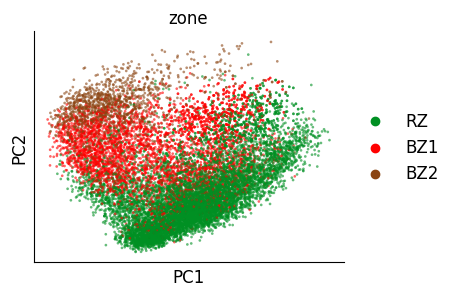

In [17]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'final_cluster' categories
custom_palette = [ "#009023", "#FF0000", "#8B4513"]  # LightGreen, BrightRed, SaddleBrown

# Map the colors to 'final_cluster' categories
ad.uns['zone_colors'] = custom_palette

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

zone_order = ["RZ", "BZ1", "BZ2"]

ad.obs['zone'] = pd.Categorical(
    ad.obs['zone'],
    categories=zone_order,
    ordered=True
)

# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='zone', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('zone_pca.svg')
plt.show()
plt.close()

## Find optimal number of PCs

In [18]:
reference_samples = list(ad.obs[ad.obs['dataset'] == 'reference']['sample'].unique())
query_samples = list(ad.obs[ad.obs['dataset'] == 'query']['sample'].unique())

In [19]:
%%time
from scpss import scPSS

scpss = scPSS(ad, 'sample', reference_samples, query_samples)
scpss.harmony_integrate()
params = scpss.find_optimal_parameters(max_n_comps=25)
scpss.set_distance_and_condition()

2024-11-26 13:57:01,524 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-11-26 13:57:07,037 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-11-26 13:57:07,104 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-11-26 13:57:11,480 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-11-26 13:57:15,806 - harmonypy - INFO - Converged after 2 iterations
INFO:harmonypy:Converged after 2 iterations


{'n_comps': 2, 'optimal_k': 5, 'optimal_p': 0.020000000000000014, 'threshold': 0.8754505410819634, 'outlier_ratio': 0.44618736383442265, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 3, 'optimal_k': 17, 'optimal_p': 0.020000000000000014, 'threshold': 2.420004310211031, 'outlier_ratio': 0.45821350762527235, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p

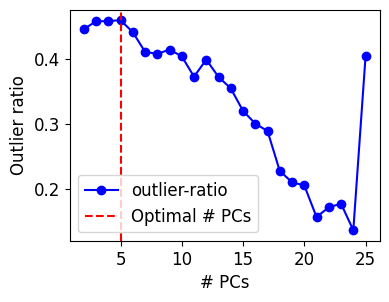

In [20]:
x_values = []
y_values = []
optimal_params = None
best_outlier_ratio = 0
for param in params:
    if (param['outlier_ratio'] > best_outlier_ratio):
        best_outlier_ratio = param['outlier_ratio']
        optimal_params = param
    x_values.append(param['n_comps'])
    y_values.append(param['outlier_ratio'])
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='outlier-ratio')
plt.legend()
plt.xlabel('# PCs')
plt.ylabel('Outlier ratio')
plt.axvline(optimal_params['n_comps'], color='r', linestyle='--', label='Optimal # PCs')
plt.legend()

plt.savefig('outlier-ratios-ncomps.svg')
plt.show()

In [21]:
ks = scpss.best_params['ks']
outlier_ratios_for_k = scpss.best_params['outlier_ratios_for_k']
optimal_k = scpss.best_params['optimal_k']

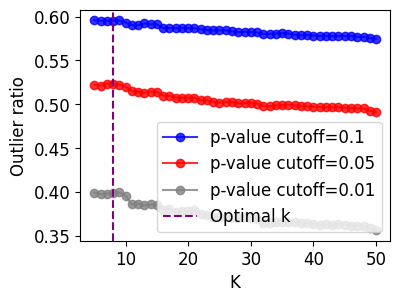

In [22]:
x_values, y_values = ks, outlier_ratios_for_k[:, 0]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', alpha=.8, label='p-value cutoff=0.1')

x_values, y_values = ks, outlier_ratios_for_k[:, 1]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='r', alpha=.8, label='p-value cutoff=0.05')

x_values, y_values = ks, outlier_ratios_for_k[:, 2]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='grey', alpha=.8, label='p-value cutoff=0.01')

plt.axvline(optimal_k, color='purple', linestyle='--', label='Optimal k')
plt.xlabel('K')
plt.ylabel('Outlier ratio')
plt.legend(loc='lower right')

plt.savefig('outlier-ratios-k.svg')
plt.show()

In [23]:
ps = scpss.best_params['ps']
outlier_ratios_for_p = scpss.best_params['outlier_ratios_for_p']
optimal_p = scpss.best_params['optimal_p']

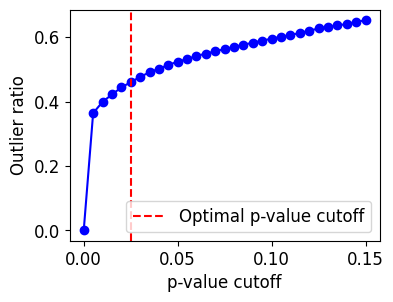

In [24]:
plt.plot(ps, outlier_ratios_for_p, marker='o', linestyle='-', color='b')
plt.axvline(optimal_p, color='r', linestyle='--', label='Optimal p-value cutoff')
plt.legend()

plt.xlabel('p-value cutoff')
plt.ylabel('Outlier ratio')

plt.savefig('outlier-ratios-p-val.svg')
plt.show()

In [25]:
dist_ref_ref = scpss.ad.obs.loc[scpss.reference_mask, 'scpss_distances']
dist_que_ref = scpss.ad.obs.loc[scpss.query_mask, 'scpss_distances']
thres = scpss.best_params['threshold']

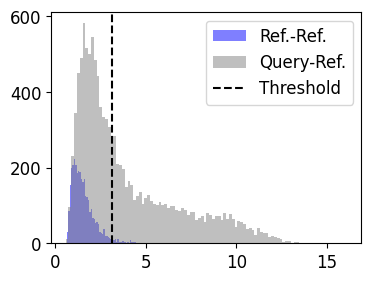

In [26]:
import matplotlib.pyplot as plt

plt.hist(dist_ref_ref, bins=100, alpha=.5, color='blue', label='Ref.-Ref.')
plt.hist(dist_que_ref, bins=100, alpha=.5, color='gray', label='Query-Ref.')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.savefig('distance-distributions-ref-que.svg')
plt.show()

In [27]:
import numpy as np

In [28]:
dist_que_healthy = dist_que_ref[scpss.ad.obs['zone'].isin(['RZ'])]
dist_que_disease = dist_que_ref[scpss.ad.obs['zone'].isin(['BZ1', 'BZ2'])]

print(np.mean(dist_que_healthy < thres), np.mean(dist_que_disease > thres))

0.8436617378302044 0.7949046920821115


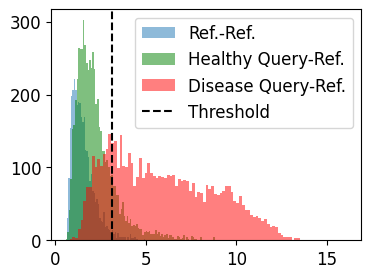

In [29]:
plt.hist(dist_ref_ref, bins=100, alpha=.5, label='Ref.-Ref.')
plt.hist(dist_que_healthy, bins=100, alpha=.5, color='green', label='Healthy Query-Ref.')
plt.hist(dist_que_disease, bins=100, alpha=.5, color='red', label='Disease Query-Ref.')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.legend()

plt.savefig('distance-distributions-ref-healthy-diseased.svg')
plt.show()

In [30]:
dist_que_bz1 = dist_que_ref[scpss.ad.obs['zone'].isin(['BZ1'])]
dist_que_bz2 = dist_que_ref[scpss.ad.obs['zone'].isin(['BZ2'])]

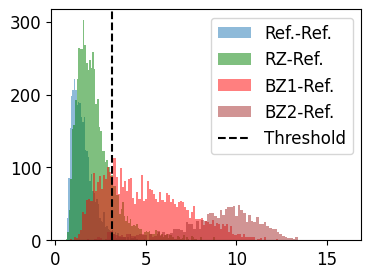

In [31]:
plt.hist(dist_ref_ref, bins=100, alpha=.5, label='Ref.-Ref.')
plt.hist(dist_que_healthy, bins=100, alpha=.5, color='green', label='RZ-Ref.')
plt.hist(dist_que_bz1, bins=100, alpha=.5, color='red', label='BZ1-Ref.')
plt.hist(dist_que_bz2, bins=100, alpha=.5, color='brown', label='BZ2-Ref.')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.legend()

plt.savefig('distance-distributions-ref-rz-bz1-bz2.svg')
plt.show()

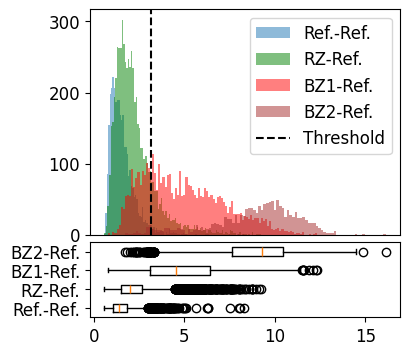

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4), gridspec_kw={'height_ratios': [3, 1]})

# Plot histograms in the first subplot
axs[0].hist(dist_ref_ref, bins=100, alpha=0.5, label='Ref.-Ref.')
axs[0].hist(dist_que_healthy, bins=100, alpha=0.5, color='green', label='RZ-Ref.')
axs[0].hist(dist_que_bz1, bins=100, alpha=0.5, color='red', label='BZ1-Ref.')
axs[0].hist(dist_que_bz2, bins=100, alpha=0.5, color='brown', label='BZ2-Ref.')
axs[0].axvline(thres, color='black', linestyle='--', label='Threshold')
axs[0].legend()

# Remove x-ticks and x-tick labels from the first subplot
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Plot boxplots in the second subplot
axs[1].boxplot(
    [dist_ref_ref, dist_que_healthy, dist_que_bz1, dist_que_bz2],
    vert=False,  # Horizontal boxplots
    labels=['Ref.-Ref.', 'RZ-Ref.', 'BZ1-Ref.', 'BZ2-Ref.']
)

# Reduce the gap between subplots
plt.subplots_adjust(hspace=0.05)  # Adjust the vertical spacing between the panels

# Save and show the figure
plt.savefig('distance-distributions-with-boxplots.svg')
plt.show()

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


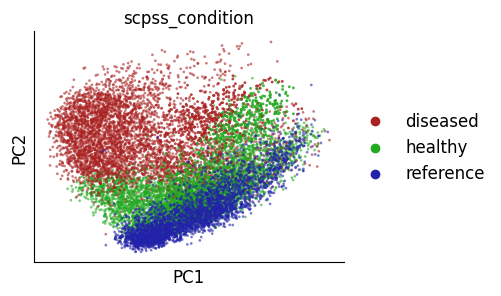

In [47]:
# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Define custom colors for 'final_cluster' categories
custom_palette = [ "#AA2222", "#22AA22", "#2222AA", ]  # LightGreen, BrightRed, SaddleBrown

# Map the colors to 'final_cluster' categories
scpss.ad.uns['scpss_condition_colors'] = custom_palette


# Generate PCA plot with custom palette
sc.pl.pca(scpss.ad, color='scpss_condition', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('scpss_condition.svg')
plt.show()
plt.close()

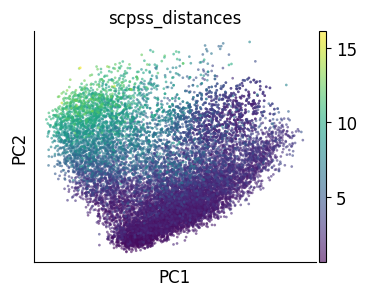

In [48]:
# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Generate PCA plot with custom palette
sc.pl.pca(scpss.ad, color='scpss_distances', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('scpss_distances.svg')
plt.show()
plt.close()

In [49]:
plt.rcParams['font.size'] = 14

In [50]:
ad_que = scpss.ad[scpss.query_mask]

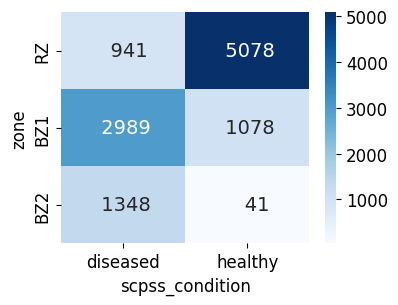

In [51]:
import seaborn as sns
cmtx = sc.metrics.confusion_matrix("zone", "scpss_condition", ad_que.obs, normalize=False)
sns.heatmap(cmtx, annot=True, fmt='5g', cmap='Blues')

plt.savefig("confusion_matrix.svg", format="svg")
plt.show()

In [52]:
true_labels = ad_que.obs['zone'].isin(['BZ1', 'BZ2']).to_numpy()
predicted_labels = ad_que.obs['scpss_condition'].isin(['diseased']).to_numpy()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.820479302832244
Precision: 0.8217127699886321
Recall: 0.7949046920821115
F1-score: 0.8080864542574996


AUC: 0.9029729110504906
AUPR: 0.903055772595275


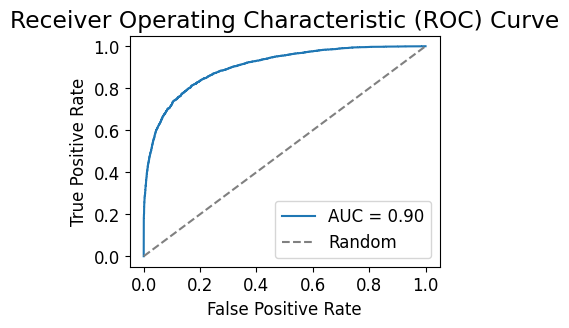

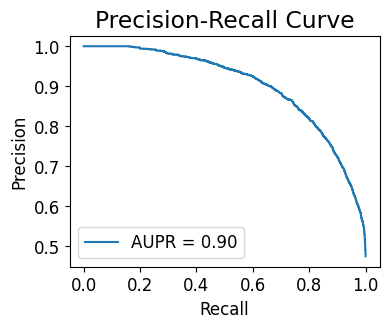

In [53]:
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

y_true = true_labels
y_scores = dist_que_ref

# Calculate AUC
auc = roc_auc_score(y_true, y_scores)
print("AUC:", auc)

# Calculate AUPR
aupr = average_precision_score(y_true, y_scores)
print("AUPR:", aupr)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('auroc.svg')
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, label=f'AUPR = {aupr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('aupr.svg')
plt.show()

## Finding differentially expressed genes

In [54]:
sc.tl.rank_genes_groups(scpss.ad, groupby='scpss_condition', method='wilcoxon', groups=['diseased'], reference='reference')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


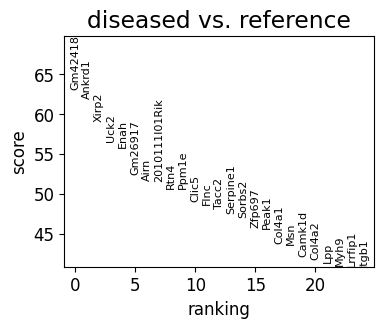

In [55]:
sc.pl.rank_genes_groups(scpss.ad, n_genes=25)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


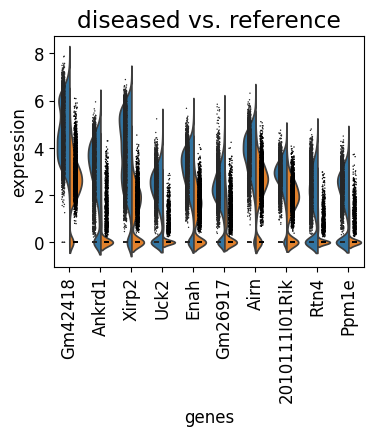

In [56]:
sc.pl.rank_genes_groups_violin(scpss.ad, n_genes=10)

categories: diseased, healthy, reference
var_group_labels: diseased


/usr/local/lib/python3.10/dist-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

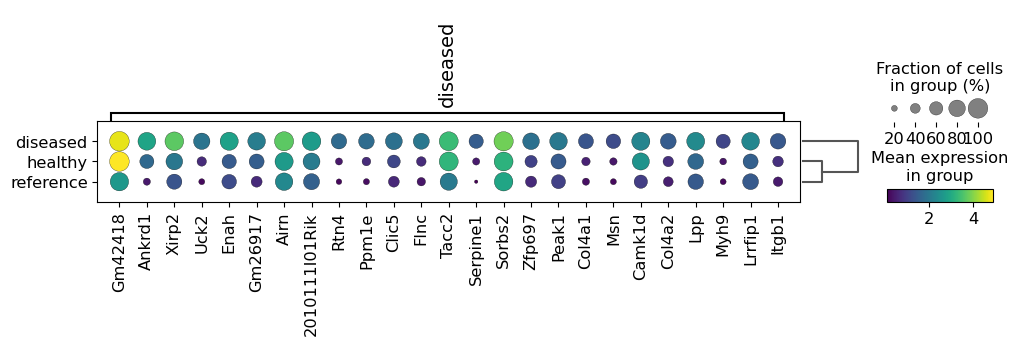

In [57]:
sc.pl.rank_genes_groups_dotplot(scpss.ad, n_genes=25, groupby='scpss_condition', cmap='viridis', save='.svg')